# Analysis of the effects of Covid19 on Heritage organisations

This notebook analyses the results of the effects of Covid19 on Heritage organisations.
This is based on 803 anonymised survey responses that Historic England have made available at https://historicengland.org.uk/coronavirus/heritage-sector/survey/

It covers: 
1. Setting up data and libraries (No findings in this section) 
2. Survey respondent characteristics
3. The effects of Covid on respondents organisations 
4. The Covid mitigation measures organisations are expecting to engage with
5. Respondents views on effects of Covid Lockdown with and without the support measures announced¶

# 1. Setting things up

In [1]:
import pandas as pd
import numpy
import matplotlib as plt
from pylab import *
from plotnine import * 
from datetime import datetime
import seaborn as sns


Read in csv, note commas were removed from source excel file to turn it into a csv

In [2]:
df=pd.read_csv("Covid_19_heritage.csv")

List the variables in the dataset

In [3]:
list(df)

['Did you respond to\xa0the sector survey on the National Lottery Heritage Fund website?:Response',
 'Organisation Type:Response',
 'What is the approximate number of paid employees (full time equivalent) at your business/organisation?:Response',
 'What is the approximate number of volunteers working with your business/organisation?:Response',
 'Area:Archaeology',
 'Area:Archives',
 'Area:Community heritage',
 'Area:Conservation Architecture/Project Management',
 'Area:Gardens and Landscapes',
 'Area:Historic buildings (including industrial heritage sites)',
 'Area:Intangible (e.g. cultural traditions people’s memories dialects)',
 'Area:Maritime and transport heritage',
 'Area:Places of worship',
 'Area:Planning',
 'Area:Public parks',
 'Area:My organisation does not work in or represent any heritage areas',
 'Area:Other',
 'Geography:All English regions',
 'Geography:East Midlands',
 'Geography:West Midlands',
 'Geography:East of England',
 'Geography:London',
 'Geography:South East 

Relabelling some of the terms that repeat in the column names and columns to make it easier to read

In [4]:
df.columns = df.columns.map(lambda col: col.replace('Area:', ''))

df.columns = df.columns.map(lambda col: col.replace('Geography:', ''))

df.columns = df.columns.map(lambda col: col.replace('Effects:', ''))

df.columns = df.columns.map(lambda col: col.replace('Measures expected:', ''))

df= df.replace({'Area:':''}, regex=True)
df=df.replace({'Effects:':''}, regex=True)
df=df.replace({'Geography:':''}, regex=True)
df=df.replace({'Measures expected:':''}, regex=True)



Sample size

In [5]:
sample_size=df.shape[0]

Functions that get reused to produce the tables

In [6]:
#Counts the survey responses for the different categories and calculates as a share of the sample
def table_producer(x,y):
  #Counts values and sorts the resulting table
  table_count=x.count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop=True)
  #Renames index column using variable y
  table_count=table_count.rename(columns={"index": y})
  #Calculates sample share
  table_count['% of respondents']=(table_count['count']/sample_size).round(2)*100 
  return table_count


#This function counts incidence of coocurrence of issues for same respondent across sample
#There must be a standard function that does this?

def cross_count(x):
  df_dummy=pd.get_dummies(x)
  #Relabels the columns
  df_dummy.columns =x.columns

  l = len(df_dummy.columns)
  #Create an empty results matrix
  results = np.zeros((l,l))
  #Does the counting of coocurrence should produce a symmetric matrix
  for i, ac in enumerate(df_dummy):
    for j, bc in enumerate(df_dummy):
           # sums the variables when both column values are true for a given row
           if i==j: #To avoid double counting
             results[j,i] = (df_dummy[bc]).sum()
           else:
             results[j,i] = (df_dummy[ac] & df_dummy[bc]).sum()
#Converts the results into a dataframe
  results = pd.DataFrame(results,index=df_dummy.columns,columns=df_dummy.columns)
  return results



# 2. Survey respondent characteristics

Heritage areas respondents covered

In [7]:
Areas=['Archaeology',
 'Archives',
 'Community heritage',
 'Conservation Architecture/Project Management',
 'Gardens and Landscapes',
 'Historic buildings (including industrial heritage sites)',
 'Intangible (e.g. cultural traditions people’s memories dialects)',
 'Maritime and transport heritage',
 'Places of worship',
 'Planning',
 'Public parks',
 'My organisation does not work in or represent any heritage areas',
 'Other']

heritage_area= table_producer(df[Areas], 'Heritage area')
heritage_area

,Heritage area,count,% of respondents
0,Historic buildings (including industrial herit...,552,69.0
1,Places of worship,379,47.0
2,Conservation Architecture/Project Management,313,39.0
3,Community heritage,310,39.0
4,Archaeology,275,34.0
5,Planning,214,27.0
6,Archives,195,24.0
7,Gardens and Landscapes,186,23.0
8,Intangible (e.g. cultural traditions people’s ...,143,18.0
9,Public parks,107,13.0


Chart of respondents by type of heritage organisation

Text(0, 0.5, '% of respondents')

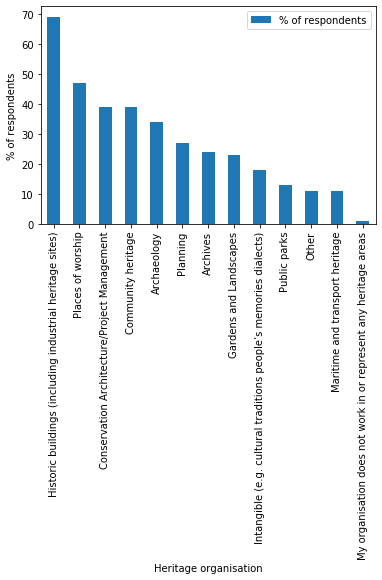

In [8]:
ax = heritage_area.plot.bar(x='Heritage area', y='% of respondents', rot=90)
ax.set_xlabel("Heritage organisation")
ax.set_ylabel("% of respondents")

Regional areas

In [9]:
Regional_areas=[
 'All English regions',
 'East Midlands',
  'West Midlands',
 'East of England',
 'London',
 'South East of England',
 'South West of England',
 'North East of England',
 'North West of England']


#Regional counts
Regions=table_producer(df[Regional_areas],'Geographical region')
Regions

,Geographical region,count,% of respondents
0,All English regions,194,24.0
1,South West of England,121,15.0
2,East of England,116,14.0
3,South East of England,104,13.0
4,London,95,12.0
5,West Midlands,89,11.0
6,North West of England,79,10.0
7,East Midlands,73,9.0
8,North East of England,50,6.0


Chart of respondents by region of operation

Text(0, 0.5, '% of respondents')

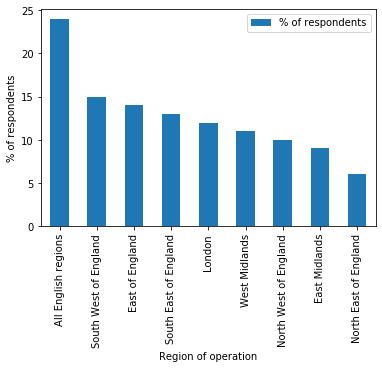

In [10]:
ax = Regions.plot.bar(x='Geographical region', y='% of respondents', rot=90)
ax.set_xlabel("Region of operation")
ax.set_ylabel("% of respondents")

Distributions of respondents size of organisation in terms of paid employees and number of volunteers

In [11]:
employees=pd.DataFrame(df['What is the approximate number of paid employees (full time equivalent) at your business/organisation?:Response'].value_counts())
volunteers=pd.DataFrame(df['What is the approximate number of volunteers working with your business/organisation?:Response'].value_counts())


employees.columns=['Paid employees']
volunteers.columns=['Volunteers']

#Merge on indices
organisation_size=employees.merge(volunteers, left_index=True, right_index=True)

organisation_size=organisation_size.reindex(['1-5','6-10','11-20', '21-50','51-100','101-500' ,'501+'])

Chart of respondents organisation size in terms of numbers of paid employees and volunteers

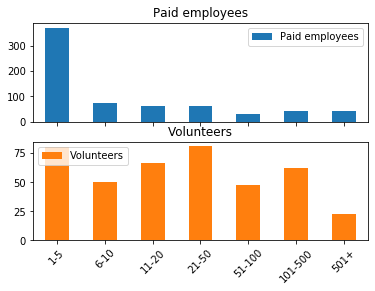

In [12]:
axes = organisation_size.plot.bar(rot=45, subplots=True)
axes[1].legend(loc=2)  

# 3. The effects of Covid on respondents organisations

In [13]:
Effects=['Loss or postponement of work',
 'Business-critical staff absence',
 'Lack of available volunteers',
 'Postponement/cancellation of planned income-generating or marketing events',
 'Reduced opening/business hours',
 'Supply chain problems',
 'Increased overheads',
 'Reduced visitor numbers',
 'Have had to furlough staff',
 'Have had to lay staff off',
 'Additional costs e.g.  investment in IT/home working',
 'Delayed payment by debtors']

covid19_effects=table_producer(df[Effects], 'Covid 19 effects')
covid19_effects

,Covid 19 effects,count,% of respondents
0,Loss or postponement of work,618,77.0
1,Postponement/cancellation of planned income-ge...,472,59.0
2,Reduced opening/business hours,348,43.0
3,Have had to furlough staff,311,39.0
4,Reduced visitor numbers,277,34.0
5,Additional costs e.g. investment in IT/home w...,249,31.0
6,Lack of available volunteers,216,27.0
7,Delayed payment by debtors,196,24.0
8,Supply chain problems,179,22.0
9,Business-critical staff absence,135,17.0


Chart of percentage of respondents experiencing different impacts from Covid 19

Text(0, 0.5, '% of respondents')

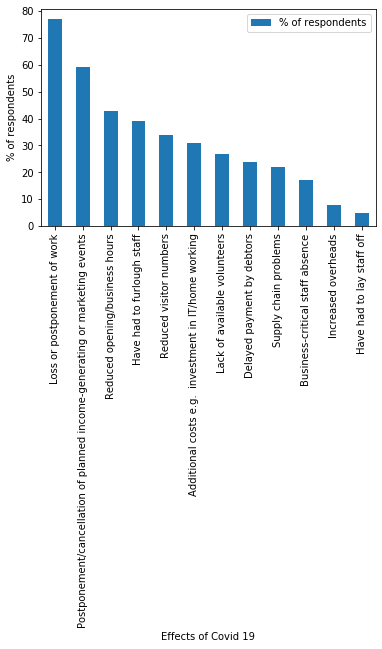

In [14]:
ax = covid19_effects.plot.bar(x='Covid 19 effects', y='% of respondents', rot=90)
ax.set_xlabel("Effects of Covid 19")
ax.set_ylabel("% of respondents")

Looks at the coocurrence of different issues  (should be reformatted)

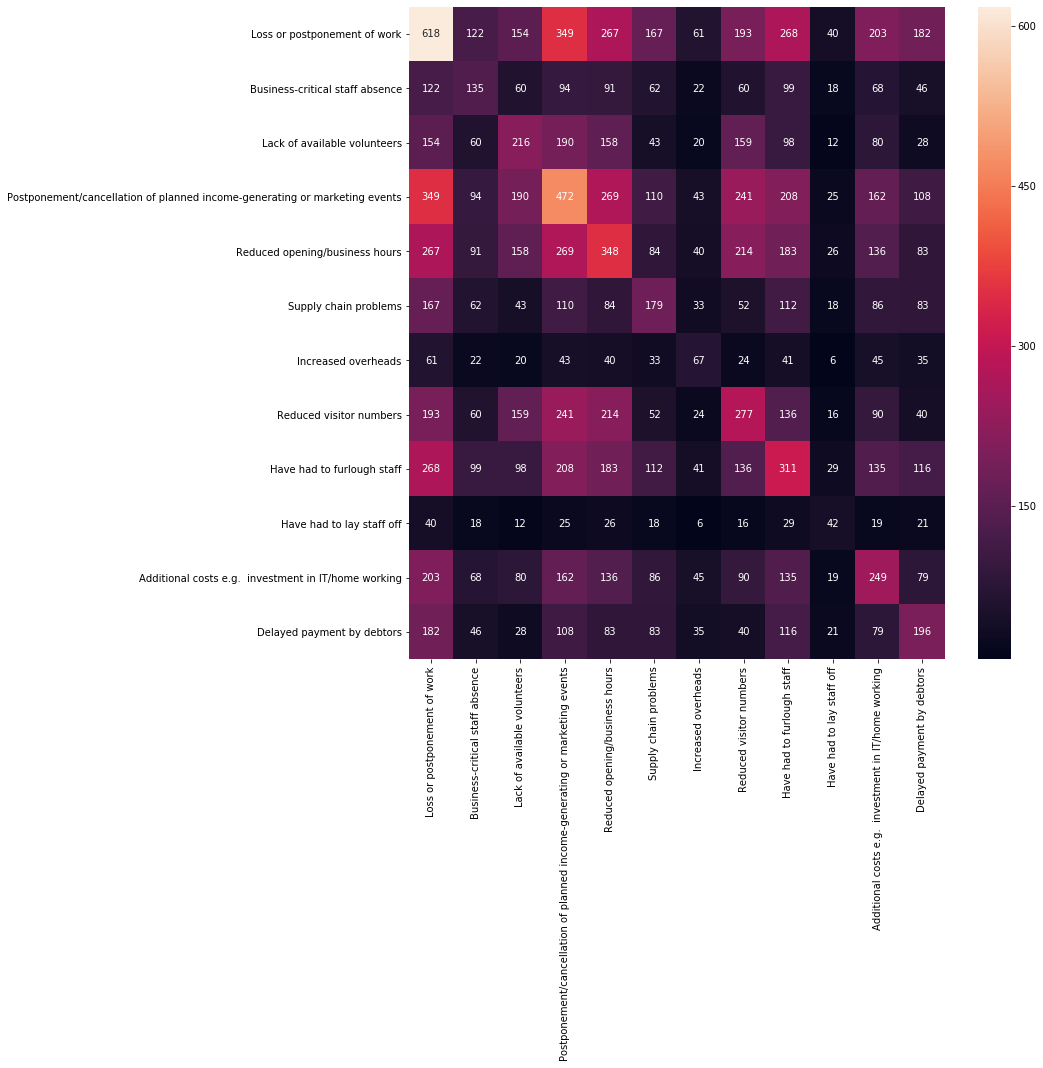

In [15]:
results=cross_count(df[Effects])

fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(results, annot=True,ax=ax, fmt='g')

# 4. Counts the Covid mitigation measures organisations are expecting to engage with

In [16]:
Measures=['Coronavirus Job Retention Scheme',
 'Deferring VAT and Self-Assessment payments',
 'Self-employment Income Support Scheme',
 'Statutory Sick Pay relief package for small and medium sized businesses (SMEs)',
 '12-month business rates holiday for all retail hospitality leisure and nursery businesses in England',
 'Small business grant funding of £10000 for all business in receipt of small business rate relief or rural rate relief',
 'Grant funding of £25000 for retail hospitality and leisure businesses with property with a rateable value between £15000 and £51000',
 'Coronavirus Business Interruption Loan Scheme offering loans of up to £5 million for SMEs through the British Business Bank',
 'Lending facility from the Bank of England to help support liquidity among larger firms helping them bridge coronavirus disruption to their cash flows through loans',
 'HMRC Time To Pay Scheme',
 'Awaiting further clarification of the Government support']


Measures_expected=table_producer(df[Measures],'Expected Measures taken')
Measures_expected

,Expected Measures taken,count,% of respondents
0,Awaiting further clarification of the Governme...,427,53.0
1,Coronavirus Job Retention Scheme,313,39.0
2,Deferring VAT and Self-Assessment payments,234,29.0
3,Self-employment Income Support Scheme,121,15.0
4,HMRC Time To Pay Scheme,114,14.0
5,Small business grant funding of £10000 for all...,112,14.0
6,Statutory Sick Pay relief package for small an...,86,11.0
7,12-month business rates holiday for all retail...,67,8.0
8,Coronavirus Business Interruption Loan Scheme ...,53,7.0
9,Grant funding of £25000 for retail hospitality...,37,5.0


Chart of the different government measures heritage organisations are expected to engage with

Text(0, 0.5, '% of respondents')

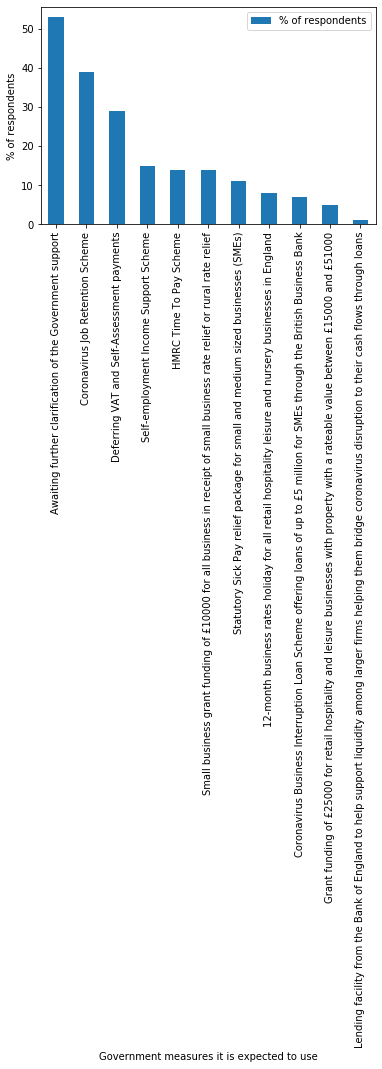

In [17]:
ax = Measures_expected.plot.bar(x='Expected Measures taken', y='% of respondents', rot=90)
ax.set_xlabel("Government measures it is expected to use")
ax.set_ylabel("% of respondents")

Looks at the coocurrence of different schemes (should be reformatted and replaced with single function)

In [ ]:
results=cross_count(df[Measures])

fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(results, annot=True,ax=ax, fmt='g')

# 5. Effect of Covid Lockdown with and without the support measures announced

Table on respondents views of how long they would be operating for if current restrictions continue to September 2020 (with and without support measures)

In [ ]:
with_measures=df['Continued operation if the current restrictions continue until September 2020 with measures:Response'].value_counts()

without_measures=df['Continued operation if the current restrictions continue until September 2020 without measures:Response'].value_counts()

without_measures=pd.DataFrame(without_measures)
without_measures.columns=['Without measures']
with_measures=pd.DataFrame(with_measures)
with_measures.columns=['With measures']
with_measures

#Merge on indices
with_without=without_measures.merge(with_measures, left_index=True, right_index=True)

#Reindex by duration of operation
with_without=with_without.reindex(["Don’t know","Less than one month","1-2 months","2-3 months",
 "3-4 months", "4-6 months" ])

with_without

In [ ]:
ax =with_without.plot.bar(rot=45)
ax.set_xlabel("Expected duration of continued operation if restrictions continue to September 2020")
ax.set_ylabel("Number of survey respondents")